# Part 2: Descriptive Data Mining - Association

## Task4. Association Mining

Load the data

In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/pos_transactions.csv')
df.info()


#Remove duplicates
df2 = df[['Transaction_Id','Product_Name']]
df2.head(5)
df = df2.drop_duplicates()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459258 entries, 0 to 459257
Data columns (total 5 columns):
Location           459258 non-null int64
Transaction_Id     459258 non-null int64
Transactin_Date    459258 non-null object
Product_Name       459258 non-null object
Quantity           459258 non-null int64
dtypes: int64(3), object(2)
memory usage: 17.5+ MB


,Transaction_Id,Product_Name
0,12359,Candy Bar
1,12362,Pain Reliever
3,12365,Toothpaste
4,12371,Bow
5,12380,Greeting Cards


Group `Transaction_Id` ,and then generate a list of all `Product_Name` purchased as we are looking to generate association rules from products purchased by each transaction

In [23]:
# group by transaction_id, then list all products
transactions = df.groupby(['Transaction_Id'])['Product_Name'].apply(list)

print(transactions.head(10))

Transaction_Id
12359                       [Candy Bar]
12362                   [Pain Reliever]
12365                      [Toothpaste]
12371                             [Bow]
12380                  [Greeting Cards]
12383                   [Pain Reliever]
12386                   [Pain Reliever]
12392               [Shampoo, Magazine]
12401    [Candy Bar, Pencils, Magazine]
12404                       [Candy Bar]
Name: Product_Name, dtype: object


Firstly, we try 0.05 as the min_support for running `apyori` model

In [24]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.01))

# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'Bow'}), support=0.054645, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Bow'}), confidence=0.054645, lift=1.0)]), RelationRecord(items=frozenset({'Candy Bar'}), support=0.171005, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Candy Bar'}), confidence=0.171005, lift=1.0)]), RelationRecord(items=frozenset({'Greeting Cards'}), support=0.146885, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Greeting Cards'}), confidence=0.146885, lift=1.0)]), RelationRecord(items=frozenset({'Magazine'}), support=0.241305, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Magazine'}), confidence=0.241305, lift=1.0)]), RelationRecord(items=frozenset({'Pain Reliever'}), support=0.0267, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pain Reliever'}), confidence=0.0267, lift=1.0)])]


Format the output

In [25]:
def convert_apriori_results_to_pandas_df(results):
    rules = []

    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                          rule_set.support, rule.confidence, rule.lift])

            # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift'])


result_df = convert_apriori_results_to_pandas_df(results)

print(result_df.head(20))

         Left_side      Right_side   Support  Confidence      Lift
0                              Bow  0.054645    0.054645  1.000000
1                        Candy Bar  0.171005    0.171005  1.000000
2                   Greeting Cards  0.146885    0.146885  1.000000
3                         Magazine  0.241305    0.241305  1.000000
4                    Pain Reliever  0.026700    0.026700  1.000000
5                          Pencils  0.134925    0.134925  1.000000
6                             Pens  0.143575    0.143575  1.000000
7                          Perfume  0.089960    0.089960  1.000000
8                   Photo Processi  0.058480    0.058480  1.000000
9                   Prescription M  0.014505    0.014505  1.000000
10                         Shampoo  0.033800    0.033800  1.000000
11                            Soap  0.043025    0.043025  1.000000
12                      Toothbrush  0.067350    0.067350  1.000000
13                      Toothpaste  0.160425    0.160425  1.00

In [26]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(10))

                    Left_side      Right_side   Support  Confidence      Lift
49                    Perfume      Toothbrush  0.021820    0.242552  3.601370
50                 Toothbrush         Perfume  0.021820    0.323979  3.601370
16                 Toothbrush             Bow  0.011340    0.168374  3.081236
15                        Bow      Toothbrush  0.011340    0.207521  3.081236
52         Candy Bar,Magazine  Greeting Cards  0.016665    0.411126  2.798966
65         Pencils,Toothpaste       Candy Bar  0.011390    0.463762  2.711980
53    Magazine,Greeting Cards       Candy Bar  0.016665    0.458649  2.682078
71        Toothpaste,Magazine  Greeting Cards  0.011945    0.377230  2.568202
62        Toothpaste,Magazine       Candy Bar  0.013720    0.433286  2.533762
56  Toothpaste,Greeting Cards       Candy Bar  0.013175    0.410692  2.401637


In [27]:
# sort all acquired rules descending by Confidence
result_df = result_df.sort_values(by='Confidence', ascending=False)
print(result_df.head(10))

                    Left_side      Right_side   Support  Confidence      Lift
65         Pencils,Toothpaste       Candy Bar  0.011390    0.463762  2.711980
53    Magazine,Greeting Cards       Candy Bar  0.016665    0.458649  2.682078
62        Toothpaste,Magazine       Candy Bar  0.013720    0.433286  2.533762
52         Candy Bar,Magazine  Greeting Cards  0.016665    0.411126  2.798966
56  Toothpaste,Greeting Cards       Candy Bar  0.013175    0.410692  2.401637
51   Candy Bar,Greeting Cards        Magazine  0.016665    0.381699  1.581813
59           Pencils,Magazine       Candy Bar  0.012005    0.379545  2.219495
71        Toothpaste,Magazine  Greeting Cards  0.011945    0.377230  2.568202
67     Pencils,Greeting Cards        Magazine  0.010955    0.374658  1.552633
70  Toothpaste,Greeting Cards        Magazine  0.011945    0.372350  1.543069


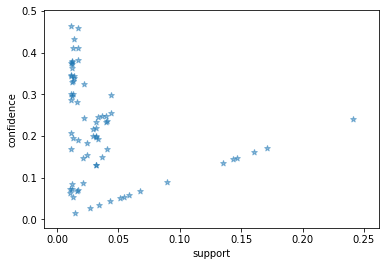

In [28]:
import matplotlib.pyplot as plt


support = result_df.as_matrix(columns=['Support'])
confidence = result_df.as_matrix(columns=['Confidence'])

plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [29]:
pens_df = result_df[result_df['Left_side'] == "Pens"]
pens_df = pens_df.sort_values(by='Lift', ascending=False)
print(pens_df)


   Left_side  Right_side   Support  Confidence      Lift
36      Pens    Magazine  0.021150    0.147310  0.610471
24      Pens   Candy Bar  0.012265    0.085426  0.499551
47      Pens  Toothpaste  0.010315    0.071844  0.447835


In [20]:
print(pens_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 36 to 47
Data columns (total 5 columns):
Left_side     3 non-null object
Right_side    3 non-null object
Support       3 non-null float64
Confidence    3 non-null float64
Lift          3 non-null float64
dtypes: float64(3), object(2)
memory usage: 144.0+ bytes
None
